In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv("drug200.csv")

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


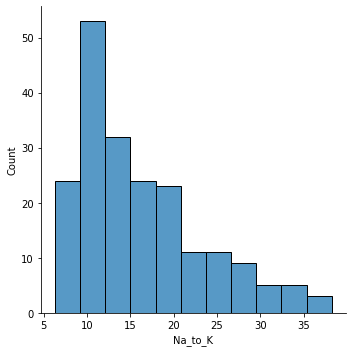

In [9]:
sns.displot(df["Na_to_K"])

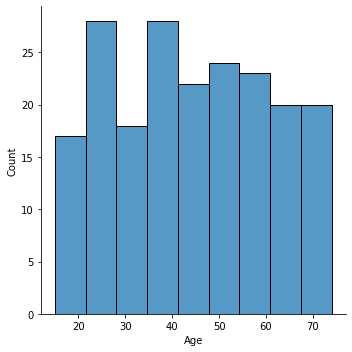

In [10]:
sns.displot(df["Age"])

In [11]:
le=LabelEncoder()

In [12]:
df["BP"]=le.fit_transform(df["BP"])

In [13]:
df["Cholesterol"]=le.fit_transform(df["Cholesterol"])

In [14]:
dum=pd.get_dummies(df["Sex"])
df=pd.concat([df,dum],axis=1)
df.drop(["Sex"],axis=1,inplace=True)

In [15]:
x=df.drop("Drug",axis=1)
y=pd.get_dummies(df["Drug"])


In [16]:
x.head()

,Age,BP,Cholesterol,Na_to_K,F,M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 6), (40, 6), (160, 5), (40, 5))

In [19]:
model=Sequential()

In [20]:
model.add(Dense(20,input_dim=6,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(5,activation="softmax"))

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=10,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 1.4992 - accuracy: 0.3688 - val_loss: 1.0157 - val_accuracy: 0.7000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0622 - accuracy: 0.5375 - val_loss: 1.0055 - val_accuracy: 0.6500
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0325 - accuracy: 0.5500 - val_loss: 0.8931 - val_accuracy: 0.6500
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0112 - accuracy: 0.5688 - val_loss: 0.8687 - val_accuracy: 0.7250
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9493 - accuracy: 0.5875 - val_loss: 0.7985 - val_accuracy: 0.7250
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.6062 - val_loss: 0.7637 - val_accuracy: 0.7000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.6313 - val_loss: 0.6706 - val_accuracy: 0.6500
Epoch 8/10
32/32 [==

In [29]:
x.head()

,Age,BP,Cholesterol,Na_to_K,F,M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0


In [24]:
original=pd.DataFrame(y_test)
predict=pd.DataFrame(model.predict(x_test))

2/2 [==============================] - 0s 3ms/step


In [25]:
original.head()

,DrugY,drugA,drugB,drugC,drugX
73,1,0,0,0,0
23,1,0,0,0,0
101,0,1,0,0,0
17,0,1,0,0,0
184,1,0,0,0,0


In [26]:
predict.columns=["DrugY_pred","DrugA_pred","DrugB_pred","DrugC_pred","DrugX_pred"]

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 80)                3280      
                                                                 
 dense_3 (Dense)             (None, 40)                3240      
                                                                 
 dense_4 (Dense)             (None, 5)                 205       
                                                                 
Total params: 7,705
Trainable params: 7,705
Non-trainable params: 0
_________________________________________________________________


In [28]:
predict.head()

,DrugY_pred,DrugA_pred,DrugB_pred,DrugC_pred,DrugX_pred
0,0.888856,0.009222,6.457838e-04,0.047025,0.054251
1,0.441247,0.192032,9.542440e-02,0.166781,0.104516
2,0.117103,0.549917,2.709458e-01,0.052609,0.009426
3,0.224942,0.590643,1.317392e-01,0.042089,0.010587
4,0.999953,0.000020,3.240247e-09,0.000025,0.000001


In [31]:
model.predict([[23,0,0,25,1,0]])

1/1 [==============================] - 0s 69ms/step


array([[9.8203087e-01, 1.5312088e-02, 6.4836444e-05, 2.4459008e-03,
        1.4620666e-04]], dtype=float32)